In [8]:
import numpy as np 
import matplotlib.pyplot as plt

#### 1.

Consider the Lagrangan interpolation of the function   $f(x) = \frac{1}{25x^{2}+1}$ for $n=6$, $n=8$, $n=10$, $n =12$ done in Exercise 1. Now, discretize the domain with $m =100$ equalli spaced points in the interval $[-1,1]$. Compute the Error-Norm-2, defined as

$$EN2 = \frac{1}{m}\sqrt{\sum_{i=1}^{m}\left(\frac{p(x)-f(x)}{f(x)}\right)^{2}}$$

for the cases $n = \{6,8,10,12\}$

**Solution**

First copy the function write in the before Exercise 

In [25]:
def L(xi,yi,x):
    data = zip(xi,yi)
    n = len(data)
    nx = len(x)
    dx = [d[0] for d in data]
    dy = [d[1] for d in data]
    La = [0.]*(nx)
    def b(j,xi):
        v = 1.0
        for k in range(n):
            if k != j:
                v *= (xi-dx[k])/(dx[j]-dx[k])
        return v
    for i,xi in enumerate(x):
        for j in xrange(n):
            La[i] +=dy[j]*b(j,xi)
    
    return np.array(La)

Consider the discretization and EN2

In [50]:
m=100
n=[6,8,10,12]
x = lambda n: np.linspace(-1,1,n)
f = lambda x: 1/(25*x**2 + 1)

Error = []
for i in n:
    xi = x(i)
    yi = f(xi)
    Error.append(np.sqrt(sum(((L(xi,yi,x(m))-f(x(m)))/f(x(m)))**2))/m)


Text(0,0.5,u'Error')

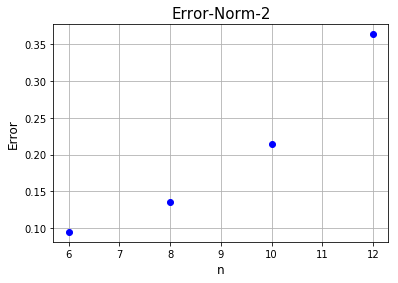

In [60]:
plt.plot(n,Error,"bo")
plt.grid(True)
plt.title("Error-Norm-2",fontsize="15")
plt.xlabel("n",fontsize="12")
plt.ylabel("Error",fontsize = "12")

#### 2.

Now discretize the same function with $m_{2}=50$ equally spaced points in the interval $[-1,1]$. Implement a routine that interpolates $f(x)$ piecewise linearly between these $m_{2}$ data points and evaluate EN2 at the $m=100$ points use above. Compare your result to the results of both exercises.



In [61]:
m2 = 50
x(m2)

array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
       -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
       -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
       -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
       -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
        0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
        0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
        0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
        0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
        0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ])